# Handling Missing Values

## Introduction
For data scientist, must know how to handle the problem of missing values, which is quite common in many real-life datasets. Incomplete data can bias the results of the machine learning models and/or reduce the accuracy of the model. 

### What Is a Missing Value?
Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset. Below is a sample of the missing data from the Titanic dataset. We can see the columns ‘Age’ and ‘Cabin’ have some missing values.

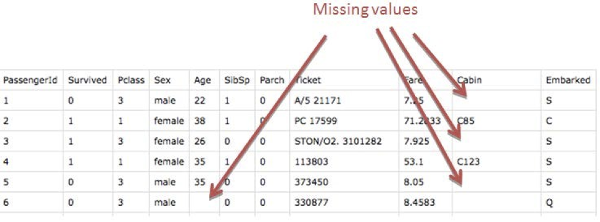

### How Is a Missing Value Represented in a Dataset?
In the dataset, the blank shows the missing values.

In Pandas, usually, missing values are represented by NaN. It stands for Not a Number.

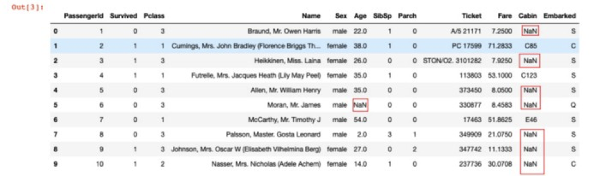

The above image shows the first few records of the Titanic dataset extracted and displayed using Pandas.

### Why Is Data Missing From the Dataset?
There can be multiple reasons why certain values are missing from the data. Reasons for the missing of data from the dataset affect the approach of handling missing data. So it’s necessary to understand why the data could be missing.

Some of the reasons are listed below:

<li> Past data might get corrupted due to improper maintenance.
<li> Observations are not recorded for certain fields due to some reasons. There might be a   
        failure in recording the values due to human error.
<li> The user has not provided the values intentionally
<li> Item nonresponse: This means the participant refused to respond.

## Types of Missing Values
Formally the missing values are categorized as follows:

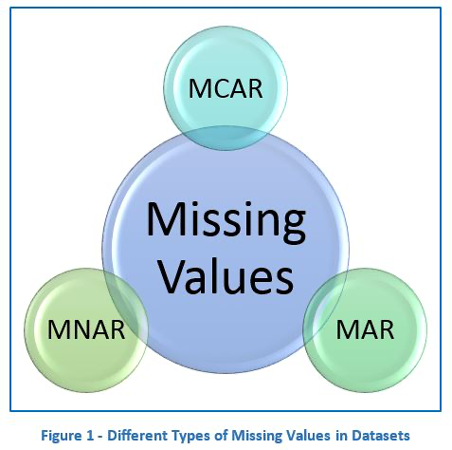

## Missing Completely At Random (MCAR)
In MCAR, the probability of data being missing is the same for all the observations. In this case, there is no relationship between the missing data and any other values observed or unobserved (the data which is not recorded) within the given dataset. That is, missing values are completely independent of other data. There is no pattern.
In the case of MCAR data, the value could be missing due to human error, some system/equipment failure, loss of sample, or some unsatisfactory technicalities while recording the values.

#### For Example, suppose in a library there are some overdue books. Some values of overdue books in the computer system are missing. The reason might be a human error, like the librarian forgetting to type in the values. So, the missing values of overdue books are not related to any other variable/data in the system. It should not be assumed as it’s a rare case. The advantage of such data is that the statistical analysis remains unbiased.

## Missing At Random (MAR)
MAR data means that the reason for missing values can be explained by variables on which you have complete information, as there is some relationship between the missing data and other values/data. In this case, the data is not missing for all the observations. It is missing only within sub-samples of the data, and there is some pattern in the missing values.

#### For example, if you check the survey data, you may find that all the people have answered their ‘Gender,’ but ‘Age’ values are mostly missing for people who have answered their ‘Gender’ as ‘female.’ (The reason being most of the females don’t want to reveal their age.)

So, the probability of data being missing depends only on the observed value or data. In this case, the variables ‘Gender’ and ‘Age’ are related. The reason for missing values of the ‘Age’ variable can be explained by the ‘Gender’ variable, but you can not predict the missing value itself.

## Missing Not At Random (MNAR)
Missing values depend on the unobserved data. If there is some structure/pattern in missing data and other observed data can not explain it, then it is considered to be Missing Not At Random (MNAR).

If the missing data does not fall under the MCAR or MAR, it can be categorized as MNAR. It can happen due to the reluctance of people to provide the required information. A specific group of respondents may not answer some questions in a survey.

#### For example, suppose the name and the number of overdue books are asked in the poll for a library. So most of the people having no overdue books are likely to answer the poll. People having more overdue books are less likely to answer the poll. So, in this case, the missing value of the number of overdue books depends on the people who have more books overdue.

#### Another example is that people having less income may refuse to share some information in a survey or questionnaire.

### Why Do We Need to Care About Handling Missing Data?
It is important to handle the missing values appropriately.

<li> Many machine learning algorithms fail if the dataset contains missing values. However, algorithms like K-nearest and Naive Bayes support data with missing values.
<li> You may end up building a biased machine learning model, leading to incorrect results if the missing values are not handled properly.
<li> Missing data can lead to a lack of precision in the statistical analysis.

# Handling Missing Data

Handling missing values is a crucial step in data preprocessing. Here are some common methods to handle missing values in a dataset:

1. **Remove Missing Values:**

* **Drop Rows:** Remove rows with missing values if the dataset is large and the number of missing values is small.

* **Drop Columns:** Remove columns with a high percentage of missing values if they are not critical to the analysis.

2. **Impute Missing Values:**

* **Mean/Median/Mode Imputation:** Replace missing values with the mean, median, or mode of the column.

* **Forward/Backward Fill:** Use the previous or next value to fill the missing values.

### Example: To remove rows with missing values

In [1]:
import pandas as pd

# Sample data with missing values
data = {'feature1': [1, 2, None, 4, 5], 'feature2': [5, None, 3, 2, 1]}
df = pd.DataFrame(data)
df

,feature1,feature2
0,1.0,5.0
1,2.0,NaN
2,NaN,3.0
3,4.0,2.0
4,5.0,1.0


In [2]:
# Drop rows with missing values
df_cleaned = df.dropna()
df_cleaned

,feature1,feature2
0,1.0,5.0
3,4.0,2.0
4,5.0,1.0


In this example, the dropna() function is used to remove rows that contain any missing values. The resulting DataFrame df_cleaned will only include rows where both 'feature1' and 'feature2' have non-missing values.

### Example: To remove columns with missing values

In [7]:
import pandas as pd

# Sample data with missing values
data = {'feature1': [1.4, 2, 3.5, 4.1, 5], 'feature2': [5, None, 3, 2, 1], 'feature3': [None, None, None, None, None]}
df = pd.DataFrame(data)
df

,feature1,feature2,feature3
0,1.4,5.0,None
1,2.0,NaN,None
2,3.5,3.0,None
3,4.1,2.0,None
4,5.0,1.0,None


In [8]:
# Drop columns with missing values
df_cleaned = df.dropna(axis=1)
df_cleaned

,feature1
0,1.4
1,2.0
2,3.5
3,4.1
4,5.0


In this example, the dropna(axis=1) function is used to remove columns that contain any missing values. The resulting DataFrame df_cleaned will only include columns where all values are non-missing.

## Imputing missing values with the mean

Imputing missing values with the mean is a common and straightforward method, especially useful in the following scenarios:

1. **Numerical Features:** When the feature with missing values is numerical, using the mean is a simple way to fill in the gaps.

2. **Small Percentage of Missing Values:** When the percentage of missing values is relatively small, imputing with the mean can be effective without significantly biasing the data.

3. **Normally Distributed Data:** If the data is approximately normally distributed, the mean is a good representative value to use for imputation.

4. **Non-Critical Features:** When the feature is not critical to the model's performance, imputing with the mean is a quick and easy solution.

In [9]:
import pandas as pd
import numpy as np

# Sample data with missing values
data = {'feature1': [1, 2, np.nan, 4, 5], 'feature2': [5, np.nan, 3, 2, 1]}
df = pd.DataFrame(data)
df

,feature1,feature2
0,1.0,5.0
1,2.0,NaN
2,NaN,3.0
3,4.0,2.0
4,5.0,1.0


In [10]:
# Impute missing values with the mean
df['feature1'].fillna(df['feature1'].mean(), inplace=True)
df['feature2'].fillna(df['feature2'].mean(), inplace=True)
df

,feature1,feature2
0,1.0,5.00
1,2.0,2.75
2,3.0,3.00
3,4.0,2.00
4,5.0,1.00


## Imputing missing values with the median
Imputing missing values with the median is a robust method, especially useful when our data contains outliers. The median is less affected by outliers compared to the mean, making it a better choice in such cases.

In [11]:
import pandas as pd
import numpy as np

# Sample data with missing values
data = {'feature1': [1, 2, np.nan, 4, 5], 'feature2': [5, np.nan, 3, 2, 1]}
df = pd.DataFrame(data)
df

,feature1,feature2
0,1.0,5.0
1,2.0,NaN
2,NaN,3.0
3,4.0,2.0
4,5.0,1.0


In [12]:
# Impute missing values with the median
df['feature1'].fillna(df['feature1'].median(), inplace=True)
df['feature2'].fillna(df['feature2'].median(), inplace=True)
df

,feature1,feature2
0,1.0,5.0
1,2.0,2.5
2,3.0,3.0
3,4.0,2.0
4,5.0,1.0


In this example, missing values in 'feature1' and 'feature2' are replaced with the median of their respective columns. This method is particularly effective for datasets with skewed distributions or outliers.

## Imputing missing values with the mode
Imputing missing values with the mode is particularly useful when dealing with categorical features or when the most frequent value is a good representative of the missing data.

In [13]:
import pandas as pd
import numpy as np

# Sample data with missing values
data = {'feature1': [1, 2, np.nan, 4, 5], 'feature2': [5, np.nan, 3, 2, 1], 'feature3': ['A', 'B', np.nan, 'B', 'A']}
df = pd.DataFrame(data)
df

,feature1,feature2,feature3
0,1.0,5.0,A
1,2.0,NaN,B
2,NaN,3.0,NaN
3,4.0,2.0,B
4,5.0,1.0,A


In [14]:
# Impute missing values with the mode
df['feature1'].fillna(df['feature1'].mode()[0], inplace=True)
df['feature2'].fillna(df['feature2'].mode()[0], inplace=True)
df['feature3'].fillna(df['feature3'].mode()[0], inplace=True)
df

,feature1,feature2,feature3
0,1.0,5.0,A
1,2.0,1.0,B
2,1.0,3.0,A
3,4.0,2.0,B
4,5.0,1.0,A


In this example, missing values in 'feature1', 'feature2', and 'feature3' are replaced with the mode (most frequent value) of their respective columns. This method is particularly effective for categorical features or when the mode is a good representative of the missing data.

## Forward/Backward Fill: 
Forward and backward fill are simple and effective methods to handle missing values by using the previous or next value in the dataset.

Forward and backward fill methods are particularly useful in the following scenarios:

1. **Time Series Data:** When dealing with time series data, forward fill can be used to propagate the last observed value forward until a new value is encountered. Similarly, backward fill can be used to propagate the next observed value backward.

2. **Sequential Data:** When the data has a natural order or sequence, such as stock prices, weather data, or sensor readings, forward and backward fill can help maintain the continuity of the data.

3. **Small Gaps:** When the missing values are few and scattered, forward and backward fill can be a simple and effective way to fill in the gaps without introducing significant bias.

4. **Data with Trends:** When the data shows a trend or pattern over time, forward and backward fill can help preserve the trend by using the most recent or next available value.

**Forward Fill:** Forward fill (also known as ffill) fills the missing values with the previous non-missing value.

**Backward Fill:** Backward fill (also known as bfill) fills the missing values with the next non-missing value.

### Example

In [16]:
import pandas as pd

# Sample data with missing values
data = {'feature1': [1, 2, None, 4, 5], 'feature2': [5, None, 3, 2, 1]}
df = pd.DataFrame(data)
df

,feature1,feature2
0,1.0,5.0
1,2.0,NaN
2,NaN,3.0
3,4.0,2.0
4,5.0,1.0


In [17]:
# Forward fill
df_ffill = df.fillna(method='ffill')

df_ffill

,feature1,feature2
0,1.0,5.0
1,2.0,5.0
2,2.0,3.0
3,4.0,2.0
4,5.0,1.0


In [18]:
# Backward fill 
df_bfill = df.fillna(method='bfill') 
df_bfill

,feature1,feature2
0,1.0,5.0
1,2.0,3.0
2,4.0,3.0
3,4.0,2.0
4,5.0,1.0
